# 时间序列预测 - LSTM
---

内容概要



## LSTM 算法简介
---

### Reference
---
1. [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)


## 使用LSTM进行时间序列预测的基本步骤
---




## 1 - 使用LSTM进行时间序列预测
----


### 数据集 & 拆分 & 预处理
----
* 洗发水销售数据集（[Shampoo Sales Dataset](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period)）记录了3年中每个月的洗发水销售数量
* 数据分为训练集（前两年）和测试集（最后一年）
* 


### LSTM 模型构建
---

The network topology consists of 1 input, a hidden layer with 4 units, and an output layer with 1 output value.

The model will be fit for 3,000 epochs with a batch size of 4. The training dataset will be reduced to 20 observations after data preparation. This is so that the batch size evenly divides into both the training dataset and the test dataset (a requirement).
Experimental Run

Each scenario will be run 30 times.

This means that 30 models will be created and evaluated for each scenario. The RMSE from each run will be collected providing a population of results that can be summarized using descriptive statistics like the mean and standard deviation.

This is required because neural networks like the LSTM are influenced by their initial conditions (e.g. their initial random weights).

The mean results for each scenario will allow us to interpret the average behavior of each scenario and how they compare.

Model Evaluation

----
A rolling-forecast scenario will be used, also called walk-forward model validation.

Each time step of the test dataset will be walked one at a time. A model will be used to make a forecast for the time step, then the actual expected value from the test set will be taken and made available to the model for the forecast on the next time step.

This mimics a real-world scenario where new Shampoo Sales observations would be available each month and used in the forecasting of the following month.

This will be simulated by the structure of the train and test datasets. We will make all of the forecasts in a one-shot method.

All forecasts on the test dataset will be collected and an error score calculated to summarize the skill of the model. The root mean squared error (RMSE) will be used as it punishes large errors and results in a score that is in the same units as the forecast data, namely monthly shampoo sales.



### how to best initialize the state of a fit LSTM for forecasting
---

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


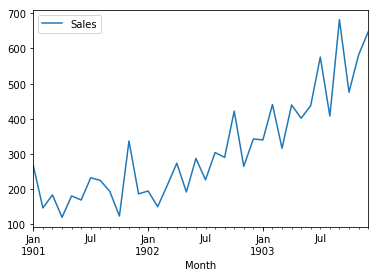

In [11]:
# load and plot dataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from math import sqrt
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
% matplotlib inline


# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('data/shampoo-sales.csv', parse_dates=[0], index_col=0, date_parser=parser)


# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df = df.drop(0)
    return df

In [ ]:
# Data Split: a training(The first two years of data) and a test set.


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


1) Test RMSE: 174.419
2) Test RMSE: 201.125
3) Test RMSE: 187.216
4) Test RMSE: 160.903
5) Test RMSE: 312.192
6) Test RMSE: 202.202
7) Test RMSE: 140.017
8) Test RMSE: 168.460
9) Test RMSE: 160.693
10) Test RMSE: 174.887
11) Test RMSE: 224.641
12) Test RMSE: 187.912
13) Test RMSE: 110.677
14) Test RMSE: 419.536
15) Test RMSE: 100.522
16) Test RMSE: 141.242
17) Test RMSE: 197.164
18) Test RMSE: 94.018
19) Test RMSE: 109.738
20) Test RMSE: 171.070
21) Test RMSE: 196.305
22) Test RMSE: 239.459
23) Test RMSE: 162.027
24) Test RMSE: 218.049
25) Test RMSE: 163.778
26) Test RMSE: 171.353
27) Test RMSE: 140.612
28) Test RMSE: 201.009
29) Test RMSE: 313.699
30) Test RMSE: 91.896
1) Test RMSE: 129.620
2) Test RMSE: 186.137
3) Test RMSE: 134.884
4) Test RMSE: 116.211
5) Test RMSE: 134.526
6) Test RMSE: 222.551
7) Test RMSE: 119.781
8) Test RMSE: 81.890
9) Test RMSE: 154.279
10) Test RMSE: 184.062
11) Test RMSE: 128.590
12) Test RMSE: 117.653
13) Test RMSE: 116.906
14) Test RMSE: 190.426
15) Test 

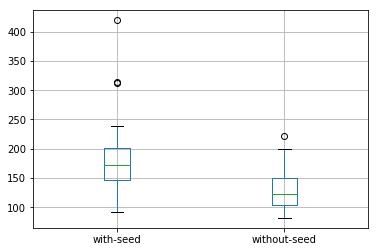

In [13]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
# be able to save images on server
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df = df.drop(0)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
	new_row = [x for x in X] + [yhat]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# run a repeated experiment
def experiment(repeats, series, seed):
	# transform data to be stationary
	raw_values = series.values
	diff_values = difference(raw_values, 1)
	# transform data to be supervised learning
	supervised = timeseries_to_supervised(diff_values, 1)
	supervised_values = supervised.values
	# split data into train and test-sets
	train, test = supervised_values[0:-12], supervised_values[-12:]
	# transform the scale of the data
	scaler, train_scaled, test_scaled = scale(train, test)
	# run experiment
	error_scores = list()
	for r in range(repeats):
		# fit the model
		batch_size = 4
		train_trimmed = train_scaled[2:, :]
		lstm_model = fit_lstm(train_trimmed, batch_size, 3000, 4)
		# forecast the entire training dataset to build up state for forecasting
		if seed:
			train_reshaped = train_trimmed[:, 0].reshape(len(train_trimmed), 1, 1)
			lstm_model.predict(train_reshaped, batch_size=batch_size)
		# forecast test dataset
		test_reshaped = test_scaled[:,0:-1]
		test_reshaped = test_reshaped.reshape(len(test_reshaped), 1, 1)
		output = lstm_model.predict(test_reshaped, batch_size=batch_size)
		predictions = list()
		for i in range(len(output)):
			yhat = output[i,0]
			X = test_scaled[i, 0:-1]
			# invert scaling
			yhat = invert_scale(scaler, X, yhat)
			# invert differencing
			yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
			# store forecast
			predictions.append(yhat)
		# report performance
		rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
		print('%d) Test RMSE: %.3f' % (r+1, rmse))
		error_scores.append(rmse)
	return error_scores

# load dataset
series = read_csv('data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, 
                  squeeze=True, date_parser=parser)
# experiment
repeats = 30
results = DataFrame()
# with seeding
with_seed = experiment(repeats, series, True)
results['with-seed'] = with_seed
# without seeding
without_seed = experiment(repeats, series, False)
results['without-seed'] = without_seed
# summarize results
print(results.describe())
# save boxplot
results.boxplot()
pyplot.savefig('boxplot.png')

In [14]:
results

,with-seed,without-seed
0,174.419267,129.620445
1,201.125301,186.136606
2,187.215790,134.883555
3,160.902587,116.210962
4,312.191566,134.526054
5,202.201707,222.551151
6,140.017043,119.781413
7,168.460197,81.890383
8,160.693238,154.278610
9,174.887371,184.062078


In [15]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64